### Autocorrelation

Autocorrelation measures the correlation of a signal with itself, however it takes into consideration a time shift $\tau$. We calculate the correlation between the overlap of the curve with its shifted self. Below, we can model this with an example of a vector $y$ which represents the function $y = sin(x)$. `y_shift_half` represents `y`, shifted by a $\tau$ value equal to half its duration or $2\pi$ seconds 

`Note:` I added a small amplitude adjustment of 1 just so we can see what the resulting curves look like in comparison to the original y values.

In [58]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks

In [349]:
pi = np.pi

interval =.01

x = np.arange(0, 2*pi, interval)
x2 = np.arange(pi, 3*pi, interval)
y = np.sin(x)
y_shift_half = np.sin(x2+pi)+1

So here we have the original `y` function in blue, while the orange line represents y shifted by $\tau = 0$ and the black line is shifted by $\tau = \pi$

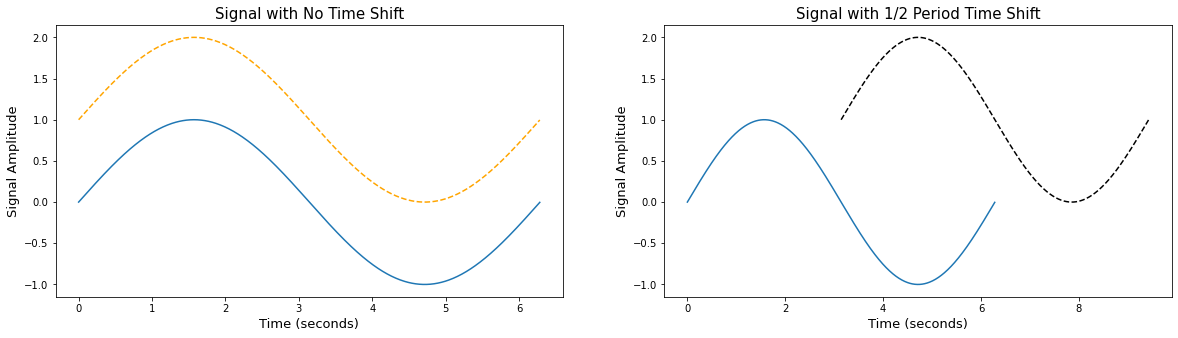

In [324]:
fig, ax = plt.subplots(1, 2, figsize= (20, 5))
ax[0].plot(x,y)
ax[0].plot(x, y+1, linestyle= '--', color = 'orange')
ax[1].plot(x,y)
ax[1].plot(x2, y_shift_half, linestyle= '--', color = 'black')
for i in range(2):
    ax[i].set_xlabel('Time (seconds)', size = 13)
    ax[i].set_ylabel('Signal Amplitude', size = 13)
ax[0].set_title('Signal with No Time Shift', size = 15)
ax[1].set_title('Signal with 1/2 Period Time Shift', size = 15)
plt.show()

We suspect that the orange and blue curves will have a correlation of 1, and that the *overlapping portions* of the black and blue curves will have a correlation of -1.

In [351]:
print('Correlation with No Time Shift:')
print(np.corrcoef(y, y)[0][1])
print('Correlation with 1/2 Total Time Shift:')
print(np.corrcoef(y[:y.shape[0]//2], y_shift_half[y.shape[0]//2+1:])[0][1])

Correlation with No Time Shift:
1.0
Correlation with 1/2 Total Time Shift:
-0.9998132285922725


We can get the correlation between a curve or vector and every possible one of its shifted values using the `np.correlate()` method. This will output a vector whose values represent the correlation between every overlap. For example, say we have the vector `a` below.

In [326]:
a = np.array([1,2,3,2])


Overlap 1 (shift = 3):
         
                 1 | 2 | 3 | 2
     1 | 2 | 3 | 2 
     
     
Overlap 2 (shift = 2):     
     
             1 | 2 | 3 | 2
     1 | 2 | 3 | 2 
     
     
Overlap 3 (shift = 1):

             1 | 2 | 3 | 2
         1 | 2 | 3 | 2 
         
         
Overlap 3 (shift = 0):

             1 | 2 | 3 | 2
             1 | 2 | 3 | 2    
             
             
          
             
             
       
             
         
...Last Overlap (shift  = -3):

             1 | 2 | 3 | 2
                         1 | 2 | 3 | 2 
                         
One thing to keep in mind is that the `np.corrcoef()` method scales each vector by its mean then scales their product by their standard deviations. The `np.correlate()` method does not normalize in any way, but that's ok for our purposes.

In [327]:
print(np.correlate(a,a,'full'))

[ 2  7 14 18 14  7  2]


We're only interested in half of this vector since it essentially is a mirror image. The `autocorr()` function below will extract just one side of the correlation vector, and we can plot what the correlation looks like for each shift/overlap. We'll do this for the `a` vector above as well as for the sine function we plotted before i.e. `y = np.sin(x)`

In [328]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]

Text(0.5, 1.0, 'Autocorrelation for Vector y = sin(x)')

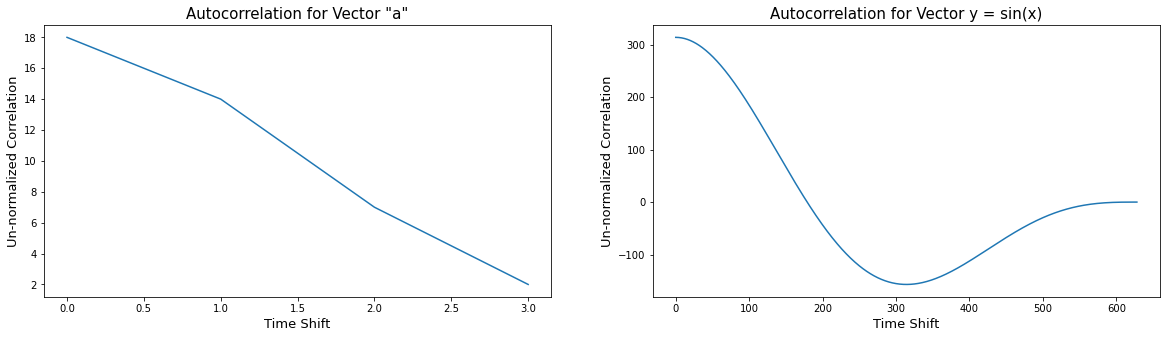

In [336]:
fix, ax = plt.subplots(1,2, figsize = (20,5))
ax[0].plot(np.arange(a.shape[0]), autocorr(a))
ax[1].plot(np.arange(y.shape[0]), autocorr(y))
for i in range(2):
    ax[i].set_xlabel('Time Shift', size = 13)
    ax[i].set_ylabel('Un-normalized Correlation', size = 13)
ax[0].set_title('Autocorrelation for Vector "a"', size = 15)
ax[1].set_title('Autocorrelation for Vector y = sin(x)', size = 15)

If we extend the duration of this sine wave, we end up with something like the below plot. The first several peak values of this plot as well as the specific locations (measured in units of time shifts) are really useful when we want to characterize a signal for machine learning. These are marked with dotted vertical lines below.

In [347]:
interval =.01
x2 = np.arange(0, 20*pi, interval)
y2 = np.sin(x2)

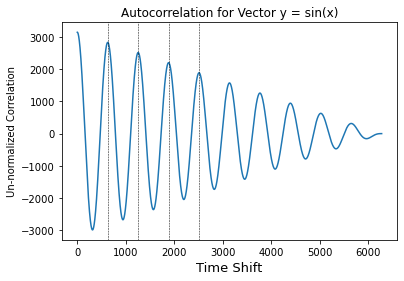

In [352]:
plt.plot(np.arange(y2.shape[0]), autocorr(y2))
plt.title('Autocorrelation for Vector y = sin(x)', size = 12)
plt.xlabel('Time Shift', size = 13)
plt.ylabel('Un-normalized Correlation', size = 10)

peaks = find_peaks(autocorr(y2))
for i in peaks[0][:-5]:
    plt.axvline(x = i, color = 'black', linestyle = '--', linewidth = .5)